In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from xgboost import XGBClassifier, XGBRegressor

In [6]:
from sklearn.model_selection import KFold, cross_val_score 

In [7]:
data = pd.read_csv('merged_df2.csv')

In [8]:
#data.head()

In [9]:
data = data.drop(columns='Unnamed: 0')

## Brief data exploration

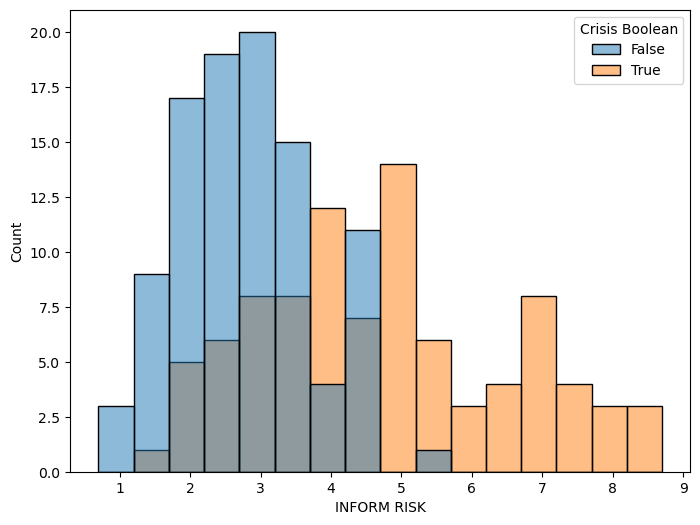

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='INFORM RISK', hue='Crisis Boolean', binwidth=.5)
plt.show()

In [28]:
mylist = {}
for i, con in enumerate(data['COUNTRY']):
    if data['Crisis Boolean'][i] == True:
        risk = data['INFORM RISK'][i]
        mylist[con] = risk
        
mylist

{'Afghanistan': 8.1,
 'Algeria': 3.6,
 'Angola': 5.2,
 'Armenia': 2.9,
 'Azerbaijan': 4.8,
 'Bangladesh': 5.7,
 'Belarus': 1.8,
 'Brazil': 4.6,
 'Bulgaria': 2.7,
 'Burkina Faso': 7.0,
 'Burundi': 5.6,
 'Cameroon': 6.6,
 'Central African Republic': 8.7,
 'Chad': 7.8,
 'Chile': 3.2,
 'Colombia': 5.3,
 'Congo': 5.0,
 'Congo DR': 7.7,
 'Costa Rica': 3.2,
 'Czech Republic': 1.8,
 'Djibouti': 4.9,
 'Dominican Republic': 4.1,
 'Ecuador': 4.7,
 'Egypt': 4.9,
 'El Salvador': 4.0,
 'Eritrea': 6.0,
 'Estonia': 1.6,
 'Eswatini': 3.3,
 'Ethiopia': 7.0,
 'Greece': 2.6,
 'Guatemala': 5.1,
 'Haiti': 7.2,
 'Honduras': 4.8,
 'Hungary': 1.9,
 'Indonesia': 4.6,
 'Iran': 5.4,
 'Iraq': 6.7,
 'Italy': 2.5,
 'Jordan': 3.8,
 'Kenya': 6.6,
 'Korea DPR': 4.1,
 'Latvia': 2.4,
 'Lebanon': 4.1,
 'Lesotho': 3.6,
 'Libya': 4.8,
 'Lithuania': 1.9,
 'Madagascar': 5.5,
 'Malawi': 4.4,
 'Malaysia': 2.9,
 'Mali': 6.8,
 'Mauritania': 4.3,
 'Mexico': 4.9,
 'Moldova Republic of': 3.1,
 'Mongolia': 2.9,
 'Morocco': 3.6,
 'Moz

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 1200x800 with 0 Axes>

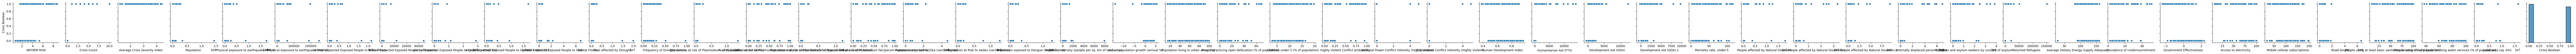

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(data=data, y_vars="Crisis Boolean")
plt.show()

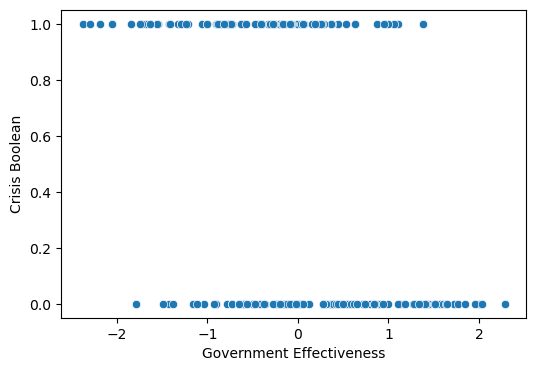

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='Government Effectiveness', y="Crisis Boolean")
plt.savefig('logistic12.png')
plt.show()

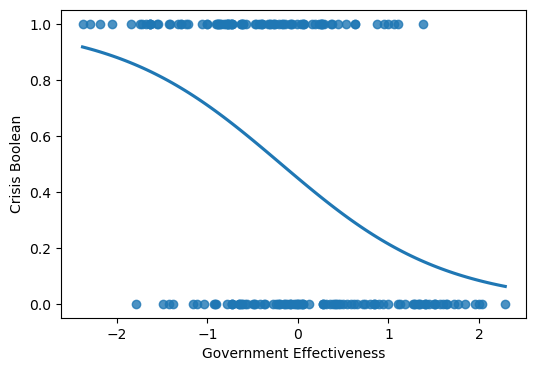

In [50]:
plt.figure(figsize=(6,4))
sns.regplot(data=data, x='Government Effectiveness', y="Crisis Boolean", logistic=True, ci=None)
plt.savefig('logistic22.png')
plt.show()

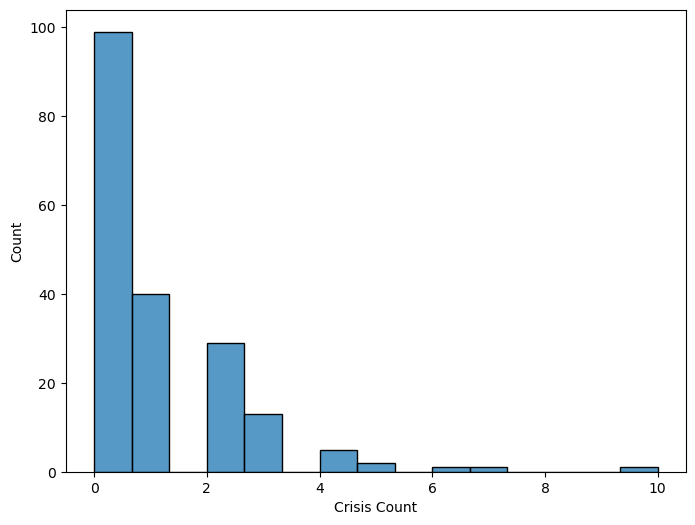

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Crisis Count')
plt.show()

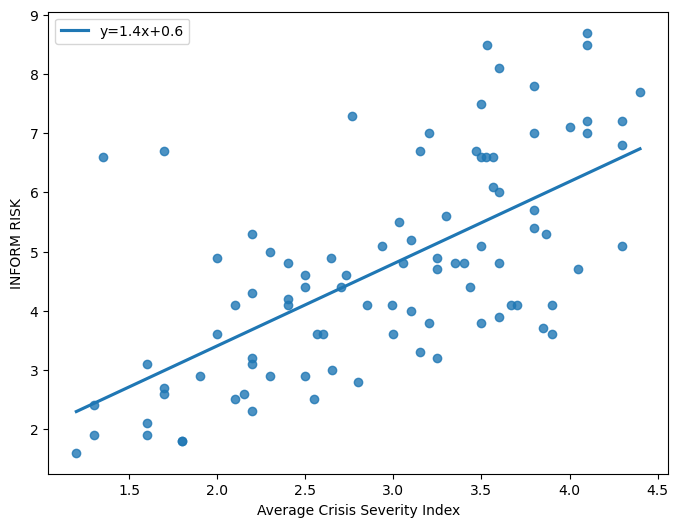

In [36]:
plt.figure(figsize=(8,6))

slope, intercept, r_value, p_value, std_err = stats.linregress(crisis['Average Crisis Severity Index'],crisis['INFORM RISK'])

ax = sns.regplot(data=crisis, x='Average Crisis Severity Index', y='INFORM RISK', ci=None,
                 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.legend()
plt.savefig('informscatter1.png')
plt.show()


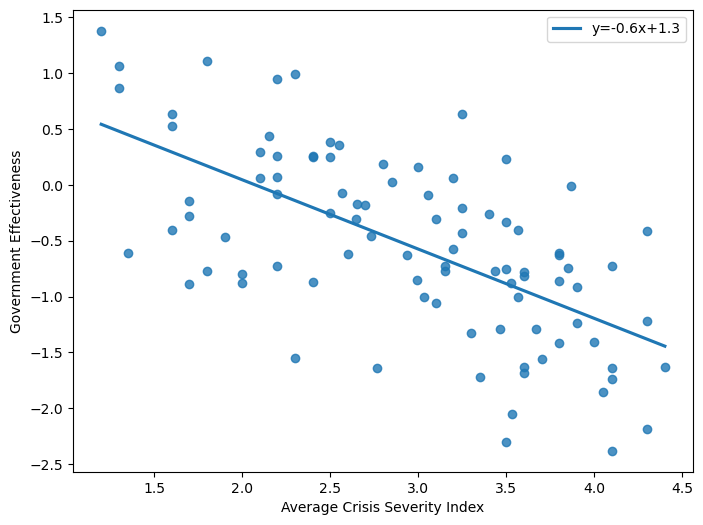

In [37]:
from scipy import stats

plt.figure(figsize=(8,6))

slope, intercept, r_value, p_value, std_err = stats.linregress(crisis['Average Crisis Severity Index'],crisis['Government Effectiveness'])

ax = sns.regplot(data=crisis, x='Average Crisis Severity Index', y='Government Effectiveness', ci=None, 
                 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

plt.savefig('informscatter2.png')

plt.show()

## Model #1: Logistic Regression
### Is there a crisis or not?

#### Only with INFORM RISK

In [40]:
X = data[['INFORM RISK']]
y = data['Crisis Boolean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [41]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

predictions = lg.predict(X_test)

print('training score:', lg.score(X_train, y_train))
print('testing score:', lg.score(X_test, y_test))

training score: 0.7697368421052632
testing score: 0.7692307692307693


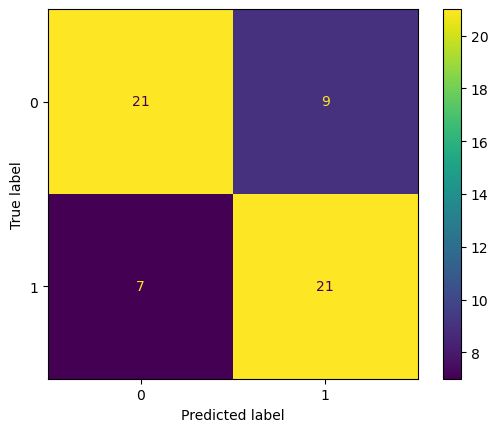

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.82      0.70      0.76        20
        True       0.73      0.84      0.78        19

    accuracy                           0.77        39
   macro avg       0.78      0.77      0.77        39
weighted avg       0.78      0.77      0.77        39



#### With multiple features

In [43]:
X = data[['INFORM RISK', 'Highly Violent Conflict probability', 'Government Effectiveness', 
          'Humanitarian Aid (FTS)', 'Development Aid (ODA)', 'Human Development Index']]
y = data['Crisis Boolean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [44]:
lg = LogisticRegression(max_iter=200)
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)

print('training score:', lg.score(X_train, y_train))
print('testing score:', lg.score(X_test, y_test))


training score: 0.8618421052631579
testing score: 0.7948717948717948


In [46]:
k_folds = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lg, X, y, scoring='accuracy',cv=k_folds)

print('Cross validation score: ',scores.mean())

Cross validation score:  0.8281578947368422


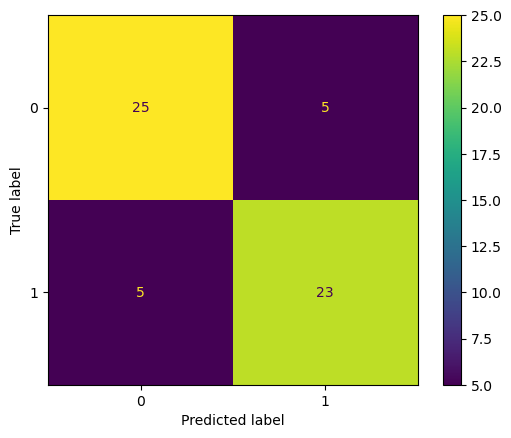

In [30]:
conf_matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [40]:
data['Crisis Boolean'].value_counts()

False    99
True     92
Name: Crisis Boolean, dtype: int64

In [42]:
baseline_accuracy = 92/(92+99)
baseline_accuracy

0.4816753926701571

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.88      0.81      0.84        26
        True       0.67      0.77      0.71        13

    accuracy                           0.79        39
   macro avg       0.77      0.79      0.78        39
weighted avg       0.81      0.79      0.80        39



## Model #2: Decision Tree 
### Is there a crisis or not?

In [72]:
X = data[['INFORM RISK','Highly Violent Conflict probability','Government Effectiveness',
          'Humanitarian Aid (FTS)','Development Aid (ODA)', 'Human Development Index']]
y = data['Crisis Boolean']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

print('training score:', dt.score(X_train, y_train))
print('testing score:', dt.score(X_test, y_test))

print(classification_report(y_test, predictions))

training score: 0.8486842105263158
testing score: 0.5641025641025641
              precision    recall  f1-score   support

       False       0.70      0.62      0.65        26
        True       0.38      0.46      0.41        13

    accuracy                           0.56        39
   macro avg       0.54      0.54      0.53        39
weighted avg       0.59      0.56      0.57        39



In [27]:
k_folds = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dt, X, y,scoring='accuracy',cv = k_folds)

print('Cross validation score: ',scores.mean())

Cross validation score:  0.811578947368421


### Hyper-parameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [48]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [49]:
grid = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [37]:
score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003616,0.004449,0.002197,0.003017,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.9375,...,0.866667,0.733333,0.933333,0.866667,0.666667,0.866667,0.800000,0.853750,0.093698,27
1,0.001590,0.002561,0.004541,0.003858,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0000,...,0.866667,0.733333,1.000000,0.866667,0.666667,0.866667,0.800000,0.873333,0.109341,1
2,0.003523,0.002900,0.002012,0.001826,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0000,...,0.866667,0.733333,1.000000,0.866667,0.666667,0.866667,0.800000,0.873333,0.109341,1
3,0.001855,0.000437,0.001926,0.000389,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0000,...,0.866667,0.733333,1.000000,0.866667,0.666667,0.866667,0.800000,0.873333,0.109341,1
4,0.001571,0.001137,0.001198,0.001489,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5,0.5000,...,0.533333,0.533333,0.533333,0.533333,0.533333,0.533333,0.466667,0.520000,0.022111,41


In [50]:
bestdt = grid.best_estimator_
bestdt

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)

In [51]:
print('training score:', bestdt.score(X_train, y_train))
print('testing score:', bestdt.score(X_test, y_test))

predictions = bestdt.predict(X_test)

print(classification_report(y_test, predictions))

training score: 0.8881578947368421
testing score: 0.7435897435897436
              precision    recall  f1-score   support

       False       0.86      0.73      0.79        26
        True       0.59      0.77      0.67        13

    accuracy                           0.74        39
   macro avg       0.73      0.75      0.73        39
weighted avg       0.77      0.74      0.75        39



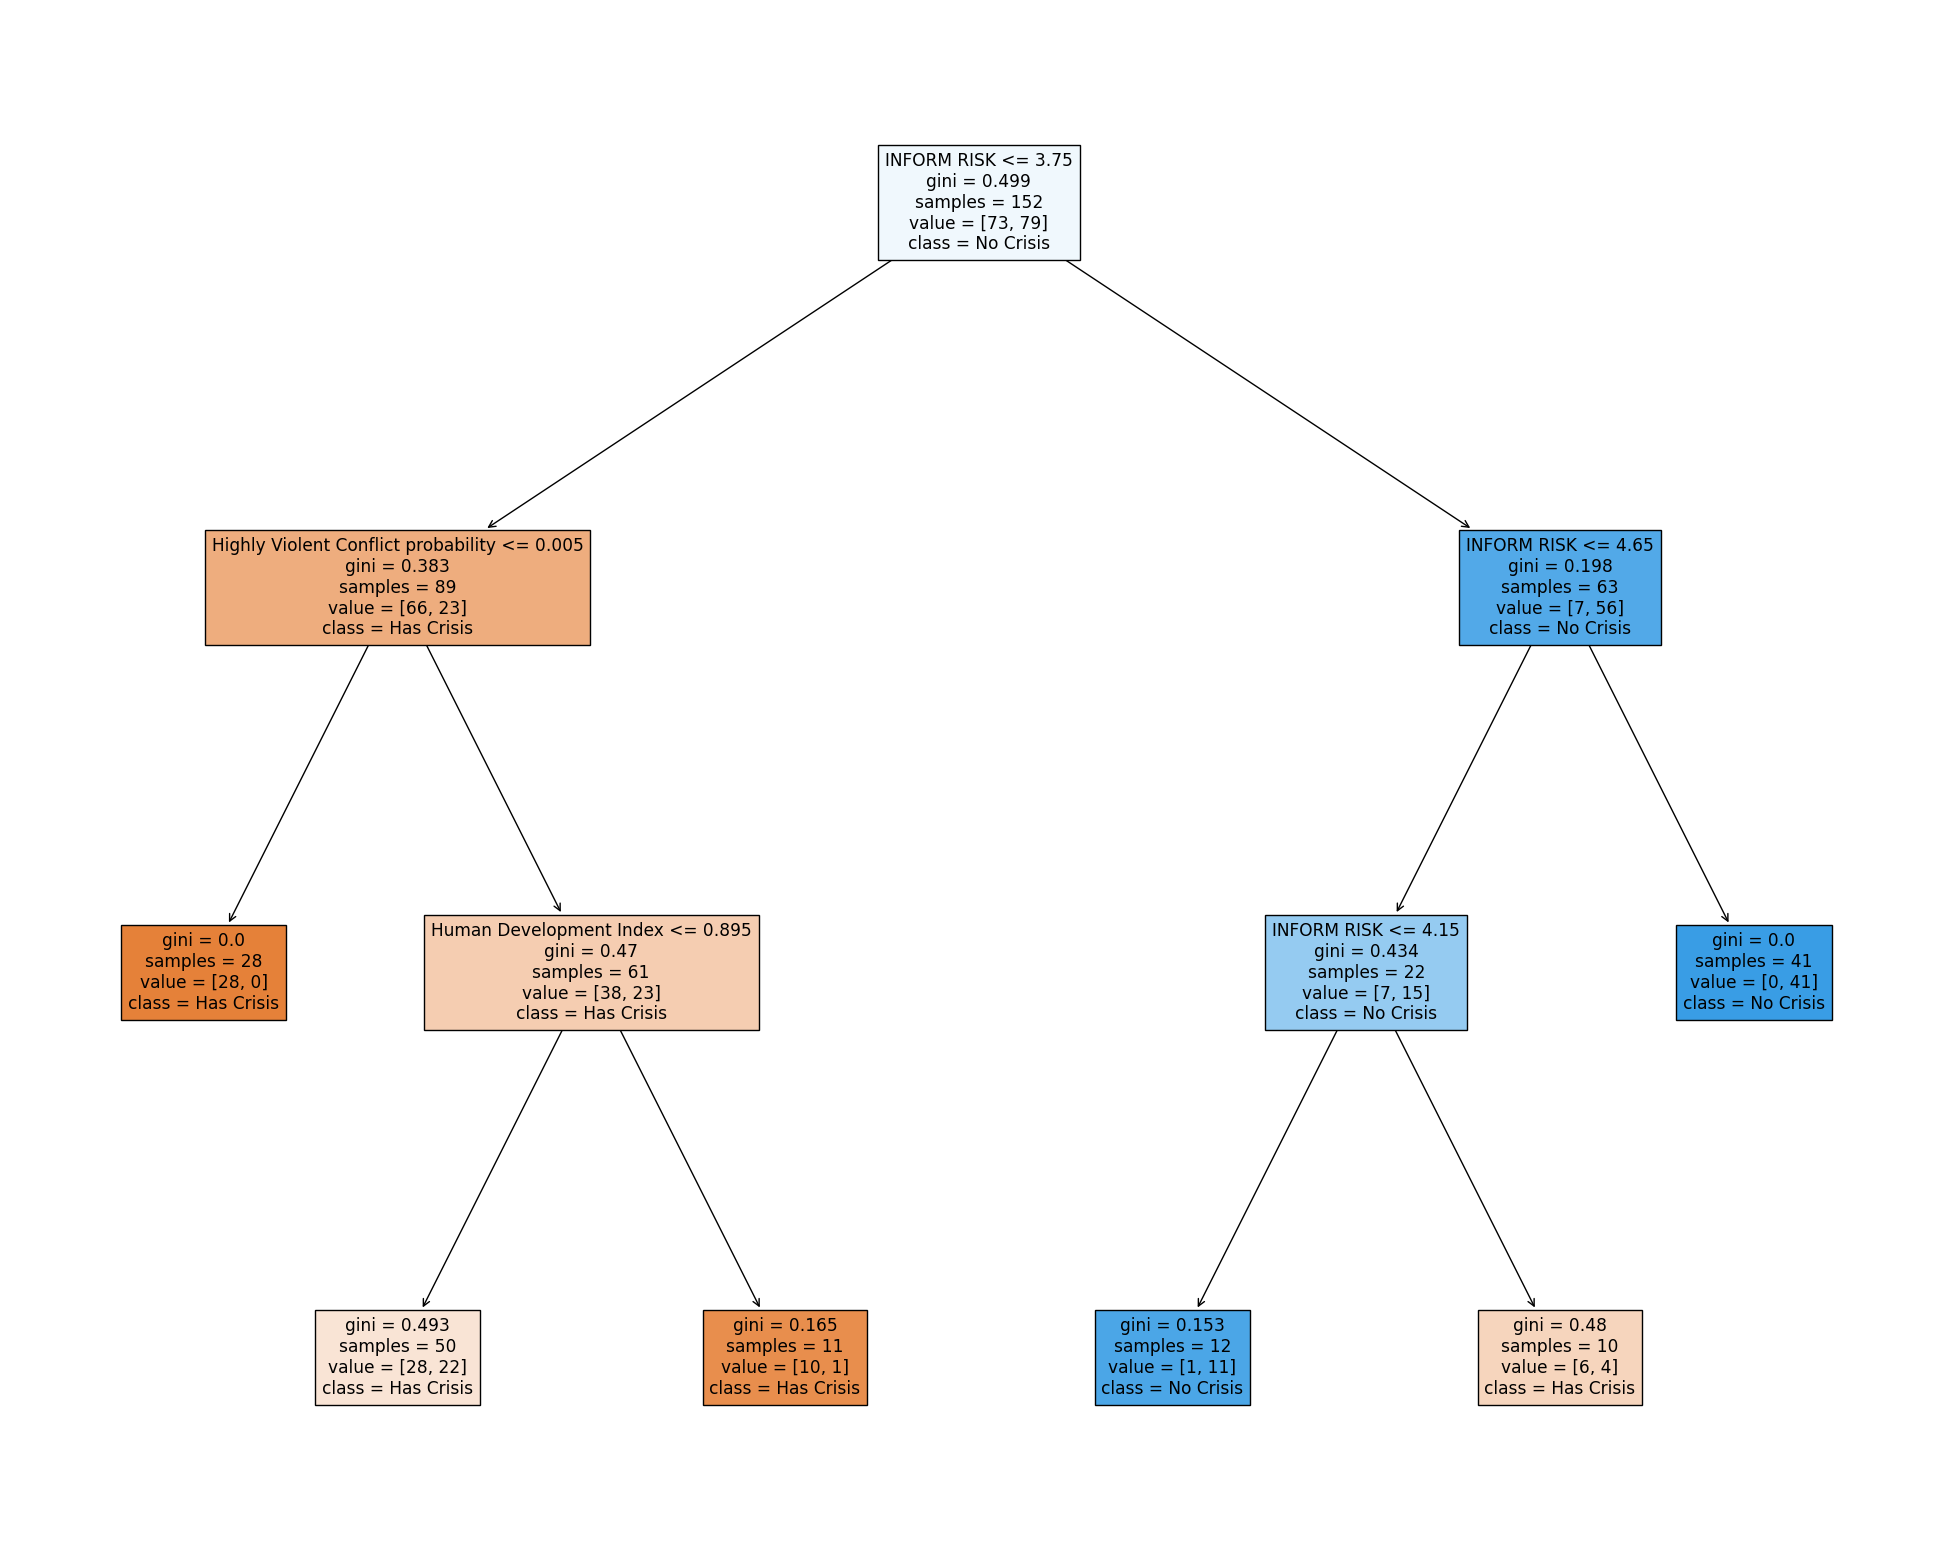

In [119]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns.tolist(),
                   class_names=['Has Crisis', "No Crisis"],
                   filled=True)


In [13]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':dt.feature_importances_}).sort_values(by='Feature Importance', ascending=False)
display(feature_importances)

,Feature,Feature Importance
2,Humanitarian Aid (FTS),0.869218
1,Highly Violent Conflict probability,0.070565
4,Development Aid (ODA),0.032614
5,Human Development Index,0.027604
0,INFORM RISK,0.000000
3,Government Effectiveness,0.000000


In [58]:
column_to_move = data.pop("Crisis Boolean")

# insert column with insert(location, column_name, column_value)

data.insert(5, "Crisis Boolean", column_to_move)

In [64]:
datacopy = data.iloc[:,:8]

In [67]:
datacopy.head(8)

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Crisis Boolean,Average Crisis Severity Index,Average Crisis Severity Category
0,Afghanistan,AFG,8.1,Very High,2.0,True,3.6,High
1,Albania,ALB,3.1,Low,0.0,False,NaN,NaN
2,Algeria,DZA,3.6,Medium,4.0,True,2.6,Medium
3,Angola,AGO,5.2,High,1.0,True,3.1,High
4,Antigua and Barbuda,ATG,2.3,Low,0.0,False,NaN,NaN
5,Argentina,ARG,2.9,Low,0.0,False,NaN,NaN
6,Armenia,ARM,2.9,Low,2.0,True,2.5,Medium
7,Australia,AUS,2.4,Low,0.0,False,NaN,NaN


### Upload Crisis Severity dataset 
### *only countries with crises

In [51]:
crisis = pd.read_csv('crisis_df.csv')

In [52]:
crisis = crisis.drop(columns='Unnamed: 0')

In [53]:
crisis.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category,Population,Physical exposure to earthquake MMI VI,Physical exposure to earthquake MMI VIII,...,People using at least basic drinking water services (% of population),Physicians Density,Proportion of the target population with access to 3 doses of diphtheria-tetanus-pertussis (DTP3) (%),Proportion of the target population with access to measles-containing-vaccine second-dose (MCV2) (%),Proportion of the target population with access to pneumococcal conjugate 3rd dose (PCV3) (%),Current health expenditure per capita,Maternal Mortality Ratio (modeled estimate),GDP per capita (current US$),Land area (sq. km),Crisis Boolean
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High,42239854,80872,38334,...,75.1,2.54,66,44,65,322.53,620.0,364,652230,True
1,Algeria,DZA,3.6,Medium,4.0,2.6,Medium,45606480,75089,22015,...,94.4,17.19,91,77,91,735.75,78.0,4274,2381740,True
2,Angola,AGO,5.2,High,1.0,3.1,High,36684202,0,0,...,57.2,2.14,45,32,34,184.14,222.0,2999,1246700,True
3,Armenia,ARM,2.9,Low,2.0,2.5,Medium,2777970,5878,1900,...,100.0,29.14,93,94,93,1721.09,27.0,7014,28480,True
4,Azerbaijan,AZE,4.8,Medium,2.0,2.4,Medium,10412652,21752,5965,...,96.0,31.68,89,90,90,655.92,41.0,7737,82658,True


In [54]:
column_to_move = crisis.pop("Crisis Boolean")

# insert column with insert(location, column_name, column_value)

crisis.insert(5, "Crisis Boolean", column_to_move)

In [68]:
crisiscopy = crisis.iloc[:,:8]

In [71]:
crisiscopy.head(8)

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Crisis Boolean,Average Crisis Severity Index,Average Crisis Severity Category
0,Afghanistan,AFG,8.1,Very High,2.0,True,3.600000,High
1,Algeria,DZA,3.6,Medium,4.0,True,2.600000,Medium
2,Angola,AGO,5.2,High,1.0,True,3.100000,High
3,Armenia,ARM,2.9,Low,2.0,True,2.500000,Medium
4,Azerbaijan,AZE,4.8,Medium,2.0,True,2.400000,Medium
5,Bangladesh,BGD,5.7,High,3.0,True,3.800000,High
6,Belarus,BLR,1.8,Very Low,1.0,True,1.800000,Low
7,Brazil,BRA,4.6,Medium,3.0,True,2.733333,Medium


In [82]:
crisis['Prevalence of Undernourishment']

0     30.1
1      2.4
2     21.6
3      2.4
4      2.4
      ... 
87     4.8
88    17.9
89    34.5
90    29.8
91    38.4
Name: Prevalence of Undernourishment, Length: 92, dtype: float64

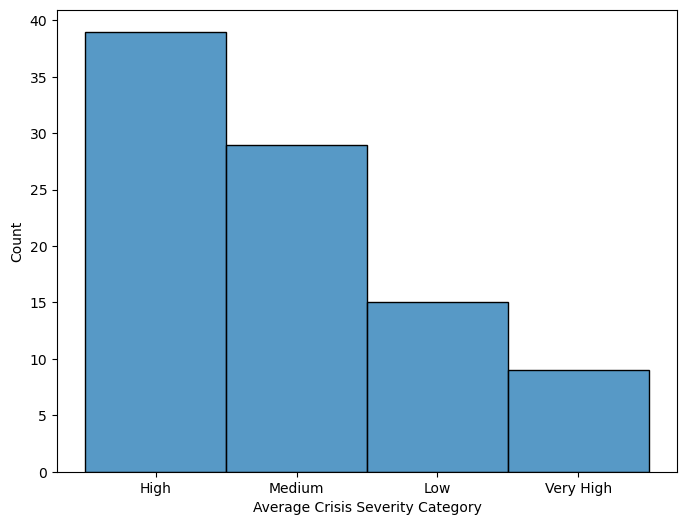

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(data=crisis, x='Average Crisis Severity Category')
plt.show()

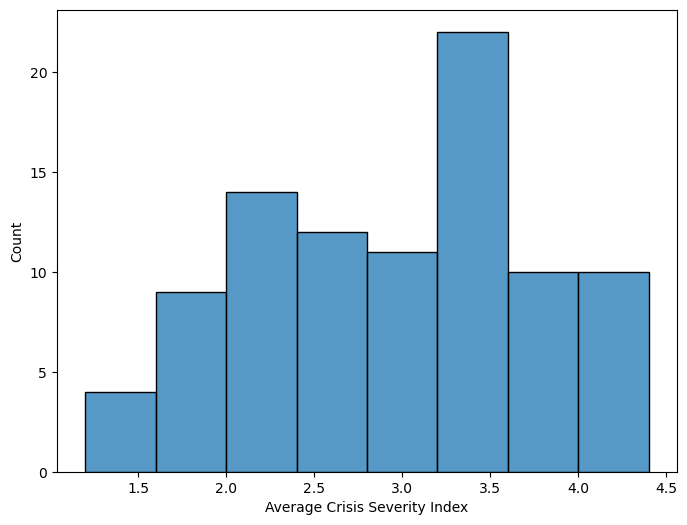

In [70]:
plt.figure(figsize=(8,6))
sns.histplot(data=crisis, x='Average Crisis Severity Index')
plt.savefig('crisishist.png')
plt.show()

## Model #3: Decision Tree 
### What is the crisis severity? [Low, Medium, High, Very High]

#### Only with INFORM RISK

In [47]:
X = crisis[['INFORM RISK', 'Government Effectiveness']]
y = crisis['Average Crisis Severity Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [88]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

print('training score:', dt.score(X_train, y_train))
print('testing score:', dt.score(X_test, y_test))


training score: 0.7808219178082192
testing score: 0.5263157894736842


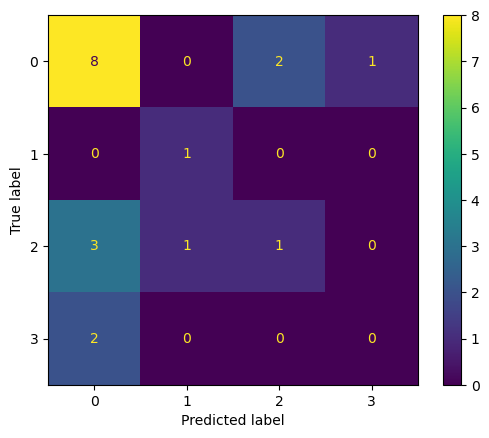

In [74]:
conf_matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

## Model #4: Random Forest
### What is the crisis severity? [Low, Medium, High, Very High]

In [55]:
class_weights = {'High':5, 'Low':1, 'Medium':9, 'Very High':13}

rf = RandomForestClassifier(class_weight=class_weights)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

print('training score:', rf.score(X_train, y_train))
print('testing score:', rf.score(X_test, y_test))


training score: 1.0
testing score: 0.6


In [ ]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':rf.feature_importances_}).sort_values(by='Feature Importance', ascending=False)
display(feature_importances)

In [56]:
k_folds = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(rf, X, y,scoring='accuracy',cv = k_folds)

print(scores.mean())

0.52


In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.80      0.57      0.67         7
         Low       1.00      1.00      1.00         1
      Medium       0.50      0.50      0.50         2
   Very High       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.57      0.52      0.54        10
weighted avg       0.76      0.60      0.67        10



C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model #5: XGBoost (Gradient Boost)
### What is the crisis severity? [Low, Medium, High, Very High]

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(y_train)
Y_test= le.fit_transform(y_test)

In [58]:
boost=XGBClassifier() 
boost.fit(X_train, Y_train)

print('Train score: '+str(boost.score(X_train,Y_train)))
print('Test score: '+str(boost.score(X_test,Y_test)))

predictions = boost.predict(X_test)
print(classification_report(Y_test, predictions))

Train score: 1.0
Test score: 0.6
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.57      0.52      0.54        10
weighted avg       0.76      0.60      0.67        10



C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model #6: Regression on Severity Index

In [65]:
crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 84 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   COUNTRY                                                                                                92 non-null     object 
 1   ISO3                                                                                                   92 non-null     object 
 2   INFORM RISK                                                                                            92 non-null     float64
 3   RISK CLASS                                                                                             92 non-null     object 
 4   Crisis Count                                                                                        

In [27]:
X = crisis[['INFORM RISK','Government Effectiveness', 'Human Development Index', 'Highly Violent Conflict probability', 
            'Prevalence of Undernourishment','Humanitarian Aid (FTS)','Development Aid (ODA)', 'Children under 5 (% of population)', 
            'Internally displaced persons (IDPs)', 'Mortality rate, under-5', 'Mobile cellular subscriptions']]
y = crisis['Average Crisis Severity Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

print('training score:', lr.score(X_train, y_train))
print('testing score:', lr.score(X_test, y_test))

training score: 0.5102300346546234
testing score: 0.5236660486992948


In [30]:
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.2f}')

rmse = mean_squared_error(y_test, predictions)
print(f'MSE: {rmse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.2f}')

MAE: 0.47
MSE: 0.29
RMSE: 0.54


In [23]:
boostR = XGBRegressor()
boostR.fit(X_train, y_train)

predictions = boostR.predict(X_test)

print('training score:', boostR.score(X_train, y_train))
print('testing score:', boostR.score(X_test, y_test))

training score: 0.9999991304606336
testing score: 0.8101981870787223


In [86]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.2f}')

mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.2f}')

RMSE: 0.34
MAE: 0.29


In [17]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':boostR.feature_importances_}).sort_values(by='Feature Importance', ascending=False)
display(feature_importances)

,Feature,Feature Importance
5,Humanitarian Aid (FTS),0.397490
0,INFORM RISK,0.127553
7,Children under 5 (% of population),0.105451
9,"Mortality rate, under-5",0.087404
2,Human Development Index,0.061108
6,Development Aid (ODA),0.056590
8,Internally displaced persons (IDPs),0.051115
3,Highly Violent Conflict probability,0.039944
4,Prevalence of Undernourishment,0.028372
10,Mobile cellular subscriptions,0.025848
